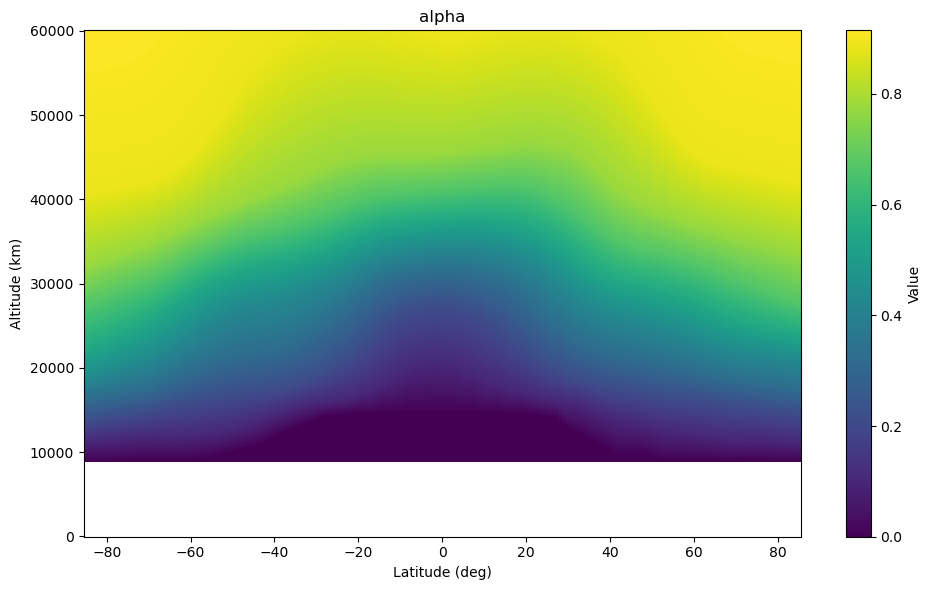

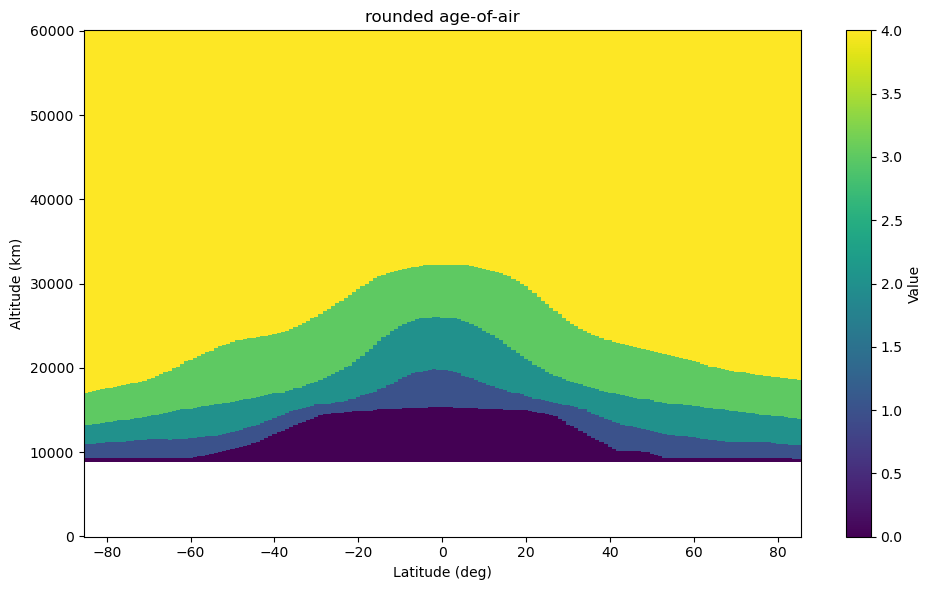

In [10]:
from openairclim.calc_swv import *
delta_h = 100.0  # height increment in meters
delta_deg = 1.0  # latitude increment
heights = np.arange(0, 60000 + delta_h, delta_h)  # 0 to 60 km
latitudes = np.arange(-85, 86, delta_deg)  # -85° to 85°

alpha, AOA = get_alpha_AOA(heights, latitudes, plot_data=True)

In [13]:
from ambiance import Atmosphere
volume = get_volume_matrix(heights, latitudes, delta_h, delta_deg)
density = Atmosphere(heights).density
mass_mat = volume * density[:, np.newaxis]  # kg

array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [4.42505447, 4.42477879, 4.42452292, ..., 4.42167656, 4.42209246,
        4.42248279],
       [4.42541441, 4.42513925, 4.4248828 , ..., 4.42204485, 4.42246169,
        4.42285261],
       [4.42577464, 4.42550001, 4.42524299, ..., 4.42241346, 4.42283123,
        4.42322275]])

In [14]:
if AOA.shape != mass_mat.shape:
    raise ValueError("AOA and mass must have the same shape.")

weighted_matrix = AOA*mass_mat
weighted_sum = np.nansum(weighted_matrix)
# remove the troposphere from the mass_mat
total_mass = np.nansum(mass_mat)
print(total_mass)
mass_mat[np.isnan(AOA)] = np.nan

total_mass = np.nansum(mass_mat)
print(total_mass)

if total_mass == 0:
    raise ValueError("Total mass cannot be zero.")

weighted_sum / total_mass

5.308281753324507e+18
1.6475383753412803e+18


np.float64(1.407396349761213)

In [2]:
46*2.25


103.5

In [1]:
67*2.25

150.75

In [4]:
21*2.25*1.4



66.14999999999999

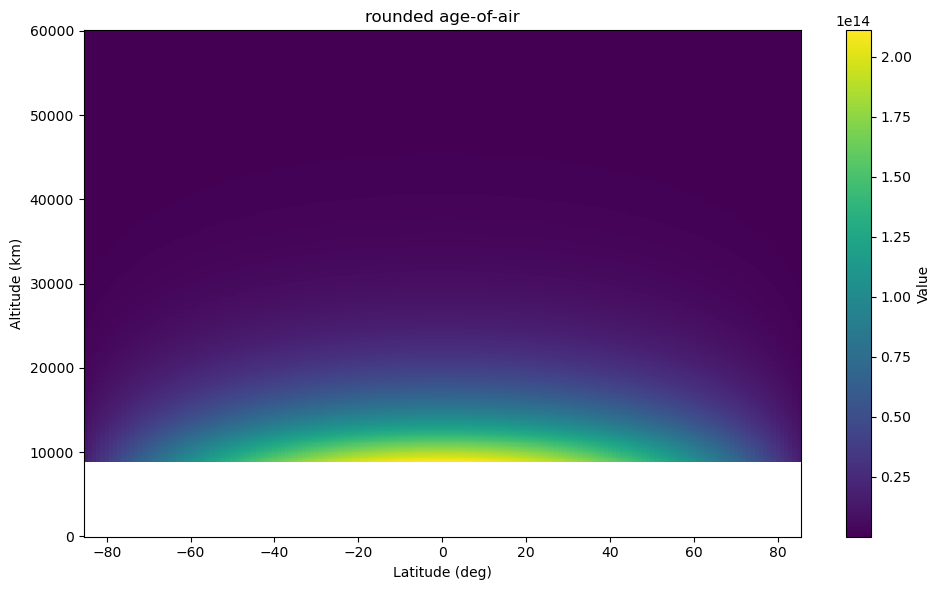

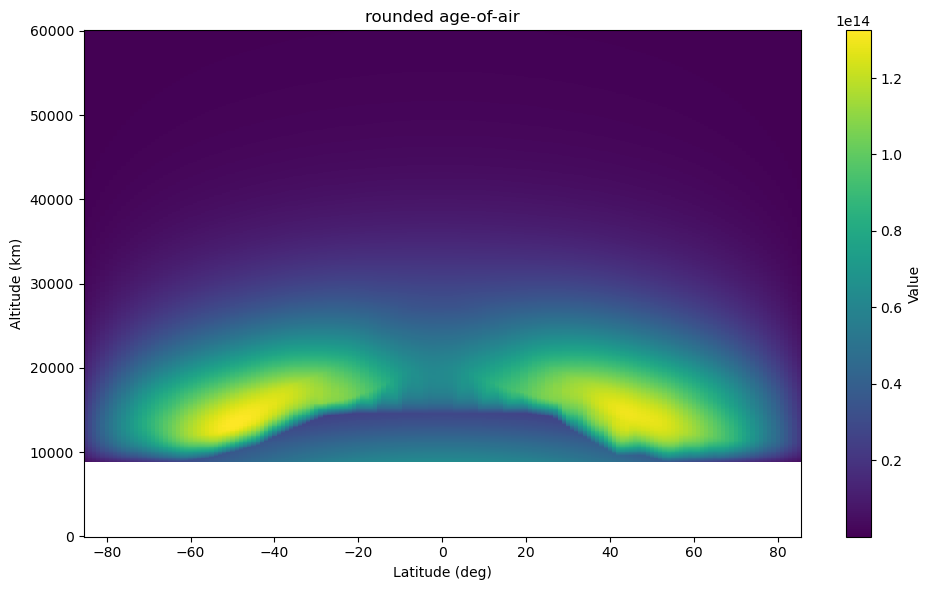

In [21]:
plt.figure(figsize=(10, 6))
# X, Y = grid[0,:], grid[:,0]
heatmap = plt.pcolormesh(
    latitudes, heights, mass_mat, shading="auto", cmap="viridis"
)
plt.colorbar(heatmap, label="Value")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (km)")
plt.title("rounded age-of-air")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
# X, Y = grid[0,:], grid[:,0]
heatmap = plt.pcolormesh(
    latitudes, heights, weighted_matrix, shading="auto", cmap="viridis"
)
plt.colorbar(heatmap, label="Value")
plt.xlabel("Latitude (deg)")
plt.ylabel("Altitude (km)")
plt.title("rounded age-of-air")
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Example arrays
a = np.array([[1., np.nan, 3.],
              [4., 5., np.nan]])

b = np.array([[10., 20., 30.],
              [40., 50., 60.]])

# Overwrite values in b with NaN wherever a has NaN
b[np.isnan(a)] = np.nan

print(b)

In [3]:
from ambiance import Atmosphere
b = [0,100,1000,10000,81000]
pressure = Atmosphere(b).pressure/100
pressure

array([1.01325000e+03, 1.00129456e+03, 8.98762776e+02, 2.64998731e+02,
       8.89223692e-03])

In [5]:
k = Atmosphere.from_pressure(pressure[:-2])
k

Atmosphere(array([31118.48202314, 31198.35352446, 31926.6854684 ]))